In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The data is from the Survey of Consumer Finances (SCF). The SCF is a survey sponsored by the US Federal Reserve. It tracks financial, demographic, and opinion information about families in the United States. The survey is conducted every three years.

In [5]:
df = pd.read_csv("SCFP2019.csv")
print("df shape: ", df.shape)
df.head()

df shape:  (28885, 351)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,6119.779308,2,75,6,12,4,2,0,...,5,3,6,3,2,10,6,6,3,3
1,1,12,4712.374912,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
2,1,13,5145.224455,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
3,1,14,5297.663412,2,75,6,12,4,2,0,...,5,2,6,2,1,10,4,4,2,2
4,1,15,4761.812371,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2


The link for variable codes is: https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbkfx0.htm

We will focus on households that have "been turned down for credit or feared being denied credit in the past 5 years." These households are identified in the "TURNFEAR" column.



In [6]:
mask = df["TURNFEAR"] == 1
df_fear = df[mask]
print("df_fear shape:", df_fear.shape)
df_fear.head()

df_fear shape: (4623, 351)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
5,2,21,3790.476607,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
6,2,22,3798.868505,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,3,2,2
7,2,23,3799.468393,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
8,2,24,3788.076005,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
9,2,25,3793.066589,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2


Exploring Age Groups:


In [7]:
age_groups = df_fear["AGECL"].unique()
print("Age Groups:", age_groups)

Age Groups: [3 5 1 2 4 6]


From the [Code Book](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbkfx0.htm) it is seen that the different labels for the Age belong to different age-groups.

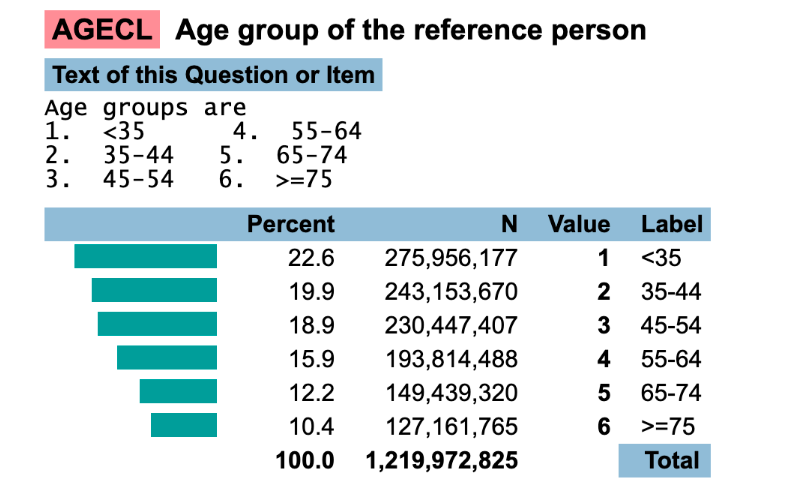

In [8]:
#Replacing labels with actual Age-groups
agecl_dict = {
    1: "Under 35",
    2: "35-44",
    3: "45-54",
    4: "55-64",
    5: "65-74",
    6: "75 or Older",
}

age_cl = df_fear["AGECL"].replace(agecl_dict)
age_cl.head()

5    45-54
6    45-54
7    45-54
8    45-54
9    45-54
Name: AGECL, dtype: object

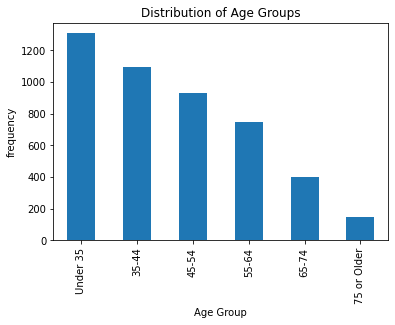

In [11]:
#Bar plot of age-groups
age_cl_value_counts = age_cl.value_counts()
age_cl_value_counts.plot(
    kind = "bar",
    xlabel = "Age Group",
    ylabel = "frequency",
    title = "Distribution of Age Groups"
);

It is evident that the people below 35 are more fearful about getting a loan. Let's explore the "AGE" column in order to verify that.

Text(0.5, 1.0, 'Credit Fearful: Age Distribution')

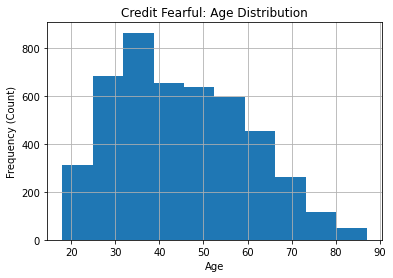

In [14]:
# Plot histogram of "AGE"
df_fear["AGE"].hist(bins = 10)
plt.xlabel("Age")
plt.ylabel("Frequency (Count)")
plt.title("Credit Fearful: Age Distribution")

So, the people between 30 and 40 years of age are more fearful

Now we will explore the "RACE" column which is encoded as following- 

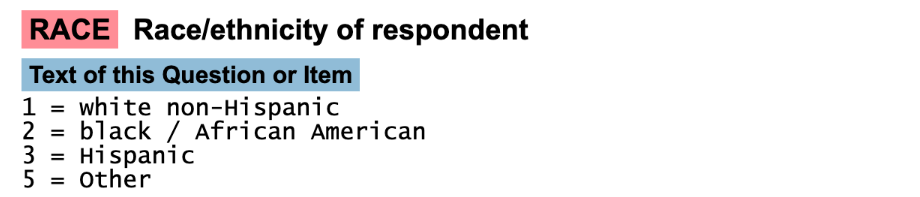

White/Non-Hispanic        0.539477
Black/African-American    0.237508
Hispanic                  0.162232
Other                     0.060783
Name: RACE, dtype: float64


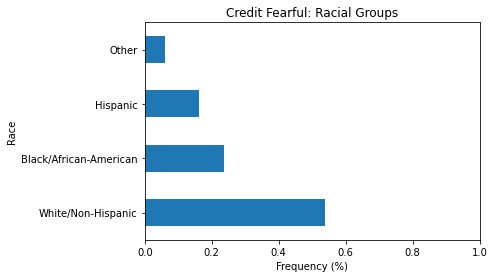

In [16]:
#Replacing labels with actual race
race_dict = {
    1: "White/Non-Hispanic",
    2: "Black/African-American",
    3: "Hispanic",
    5: "Other",
}
race = df_fear["RACE"].replace(race_dict)
race_value_counts = race.value_counts(normalize = True)
print(race_value_counts)
# Creating bar chart of race_value_counts
race_value_counts.plot(kind = "barh")
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("Credit Fearful: Racial Groups");

It looks like White people are more Fearful. That does not seem right. Let's plot the distribution of races for the complete data instead of only credit fearful people.

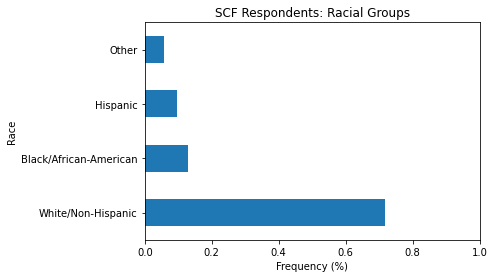

In [17]:
race = df["RACE"].replace(race_dict)
race_value_counts = race.value_counts(normalize = True)
# Create bar chart of race_value_counts
race_value_counts.plot(kind = "barh")
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("SCF Respondents: Racial Groups");

It turns out the data has more than 70% white people but the credit fearful group has around 55% white people. So, the proportion of white who are credit feearful is less than there number in the complete dataset.

Moving on to the "INCCAT" column which represents income groups as following- 

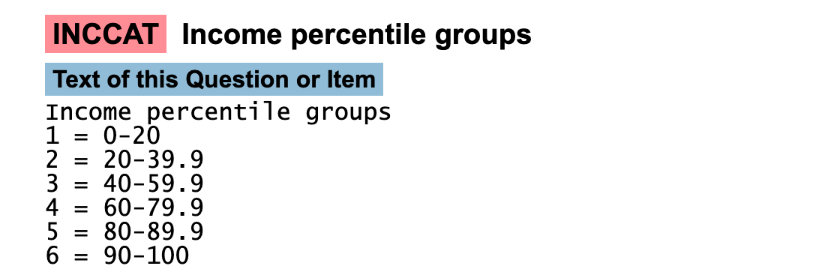

In [18]:
inccat_dict = {
    1: "0-20",
    2: "21-39.9",
    3: "40-59.9",
    4: "60-79.9",
    5: "80-89.9",
    6: "90-100",
}
df_inccat = (
    df["INCCAT"]
    .replace(inccat_dict)
    .groupby(df["TURNFEAR"])
    .value_counts(normalize = True)
    .rename("frequency")
    .to_frame()
    .reset_index()
)
print("Dataframe representing distribution of INCCAT for fearful and non-fearful")
df_inccat

,TURNFEAR,INCCAT,frequency
0,0,90-100,0.297296
1,0,60-79.9,0.174841
2,0,40-59.9,0.143146
3,0,0-20,0.140343
4,0,21-39.9,0.135933
5,0,80-89.9,0.108441
6,1,0-20,0.288125
7,1,21-39.9,0.256327
8,1,40-59.9,0.228856
9,1,60-79.9,0.132598


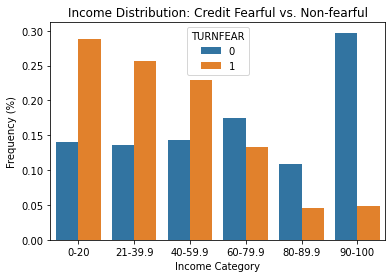

In [19]:
# Create bar chart of `df_inccat`
sns.barplot(
    x = "INCCAT",
    y = "frequency",
    data = df_inccat,
    hue = "TURNFEAR",
    order = inccat_dict.values()
)
plt.xlabel("Income Category")
plt.ylabel("Frequency (%)")
plt.title("Income Distribution: Credit Fearful vs. Non-fearful");

It can be seen from the bar plot that the proportion of credit fearful people decreases as the income increases.

Now, let's explore "ASSETS".

In [20]:
asset_house_corr = df_fear["ASSET"].corr(df_fear["HOUSES"])
print("Credit Fearful: Asset Houses Correlation:", asset_house_corr)
asset_house_corr = df["ASSET"].corr(df["HOUSES"])
print("SCF: Asset Houses Correlation:", asset_house_corr)

Credit Fearful: Asset Houses Correlation: 0.583287973597916
SCF: Asset Houses Correlation: 0.5198273544779252


So, the correlation between the houses and Assets is greter for people who are fearful. This indicates that the credit fearful people have Houses as their primary Assets. 

In [23]:
cols = ["ASSET", "HOUSES", "INCOME", "DEBT", "EDUC"]
corr = df[cols].corr()
print("Correlation matrix for all rows")
corr.style.background_gradient(axis=None)

Correlation matrix for all rows


,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.519827,0.622429,0.261250,0.116673
HOUSES,0.519827,1.000000,0.247852,0.266661,0.169300
INCOME,0.622429,0.247852,1.000000,0.114646,0.069400
DEBT,0.261250,0.266661,0.114646,1.000000,0.054179
EDUC,0.116673,0.169300,0.069400,0.054179,1.000000


In [24]:
corr = df_fear[cols].corr()
print("Correlation matrix for fearful")
corr.style.background_gradient(axis=None)

Correlation matrix for fearful


,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.583288,0.722074,0.474658,0.113536
HOUSES,0.583288,1.000000,0.264099,0.962629,0.160348
INCOME,0.722074,0.264099,1.000000,0.172393,0.133170
DEBT,0.474658,0.962629,0.172393,1.000000,0.177386
EDUC,0.113536,0.160348,0.133170,0.177386,1.000000


The correlation matrices show that their is substantial difference between the correlations of Houses and Asset,  Asset and Income and also Asset and Debt of the complete data and the fearful data.

Moving on to the Education column.

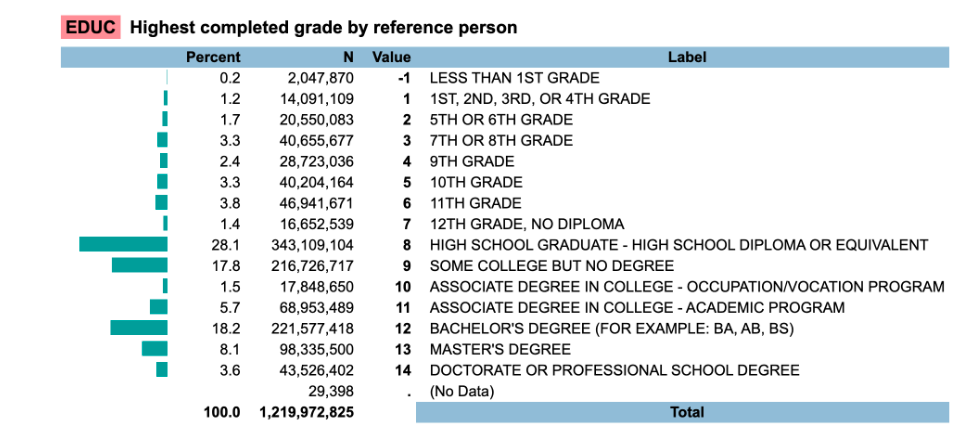

In [25]:
df_educ = (
    df["EDUC"]
    .groupby(df["TURNFEAR"])
    .value_counts(normalize = True)
    .rename("frequency")
    .to_frame()
    .reset_index()
)
df_educ

,TURNFEAR,EDUC,frequency
0,0,12,0.257481
1,0,8,0.192029
2,0,13,0.149823
3,0,9,0.129833
4,0,14,0.096117
5,0,10,0.051150
6,0,11,0.046492
7,0,7,0.019578
8,0,4,0.012035
9,0,6,0.011953


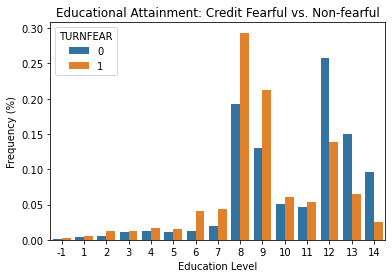

In [26]:
# Bar chart of `df_educ`
sns.barplot(
    x = "EDUC",
    y = "frequency",
    data = df_educ,
    hue = "TURNFEAR"
)
plt.xlabel("Education Level")
plt.ylabel("Frequency (%)")
plt.title("Educational Attainment: Credit Fearful vs. Non-fearful");

In this plot, we can see that a much higher proportion of credit-fearful respondents have only a high school diploma, while university degrees are more common among the non-credit fearful.

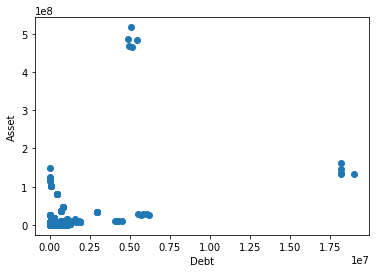

In [30]:
# Scatter plot of ASSET vs DEBT, df
plt.scatter(x = "DEBT",
           y = "ASSET",
           data = df_fear)
plt.xlabel("Debt")
plt.ylabel("Asset");

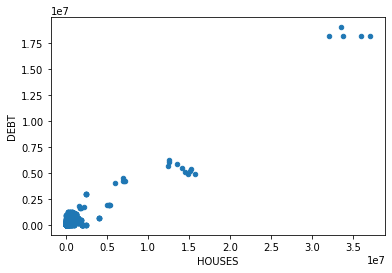

In [32]:
# Scatter plot of HOUSES vs DEBT, df_fear
df_fear.plot.scatter(x = "HOUSES", y = "DEBT");

### Preparing Data For Clustering

We have to exclude the ultra wealthy people from the dataset as they are outliers and any model trained on that will not genaralize properly.

In [41]:
def wrangle(filepath):
    #Reading file into a dataframe
    df = pd.read_csv(filepath)
    mask1 = df["TURNFEAR"] == 1
    mask2 = df["NETWORTH"] < 2e6
    df = df[mask1 & mask2]
    
    return df

In [42]:
df = wrangle("SCFP2019.csv")
print(df.shape)
df.head()

(4418, 351)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
5,2,21,3790.476607,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
6,2,22,3798.868505,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,3,2,2
7,2,23,3799.468393,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
8,2,24,3788.076005,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
9,2,25,3793.066589,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2


Let's find out the columns which have highest variances.

In [43]:
print("Top 10 features having high variances")
top_ten_var = df.var().sort_values(ascending = False).head(10)
top_ten_var

Top 10 features having high variances


ASSET       8.303967e+10
NFIN        5.713939e+10
NETWORTH    4.847029e+10
HOUSES      2.388459e+10
NHNFIN      2.254163e+10
DEBT        1.848252e+10
KGTOTAL     1.346475e+10
BUS         1.256643e+10
ACTBUS      1.251892e+10
PLOAN1      1.140894e+10
dtype: float64

In [44]:
# Horizontal bar chart of `top_ten_var`
import plotly.express as px
fig = px.bar(
    x = top_ten_var,
    y = top_ten_var.index,
    title = "SCF: High Variance Features"
)
fig.update_layout(xaxis_title = "Variance", yaxis_title = "Feature")
fig.show()

In [45]:
#Boxplot of `NHNFIN`
fig = px.box(
    data_frame = df,
    x = "NHNFIN",
    title = "Distribution of Non-home, Non-Financial Assets"
)
fig.update_layout(xaxis_title = "NHNFIN")
fig.show()

Still too many outliers. The data is right-skewed. We will use trimmed variance.

In [47]:
# Calculate trimmed variance
from scipy.stats.mstats import trimmed_var
top_ten_trim_var = df.apply(trimmed_var).sort_values().tail(10)
top_ten_trim_var

WAGEINC     5.550737e+08
HOMEEQ      7.338377e+08
NH_MORT     1.333125e+09
MRTHEL      1.380468e+09
PLOAN1      1.441968e+09
DEBT        3.089865e+09
NETWORTH    3.099929e+09
HOUSES      4.978660e+09
NFIN        8.456442e+09
ASSET       1.175370e+10
dtype: float64

In [48]:
# Horizontal bar chart of `top_ten_trim_var`
fig = px.bar(
    x = top_ten_trim_var,
    y = top_ten_trim_var.index,
    title = "SCF: High Variance Features"
)
fig.update_layout(xaxis_title = "Trimmed Variance", yaxis_title = "Feature")
fig.show()

We will use top 5 trimmed variance columns for clustering\

In [49]:
#List of top 5 high trimmed variance columns
high_var_cols = top_ten_trim_var.tail(5).index.to_list()
high_var_cols

['DEBT', 'NETWORTH', 'HOUSES', 'NFIN', 'ASSET']

In [51]:
X = df[high_var_cols]
print("X shape:", X.shape)
X.head()

X shape: (4418, 5)


,DEBT,NETWORTH,HOUSES,NFIN,ASSET
5,12200.0,-6710.0,0.0,3900.0,5490.0
6,12600.0,-4710.0,0.0,6300.0,7890.0
7,15300.0,-8115.0,0.0,5600.0,7185.0
8,14100.0,-2510.0,0.0,10000.0,11590.0
9,15400.0,-5715.0,0.0,8100.0,9685.0


As is evident from the representation above, the columns are not scaled. It will be a problem for clustering. Let's scale the data using standard scaler.

In [53]:
# Instantiating transformer
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

# Transforming `X`
X_scaled_data = ss.fit_transform(X)

# Putting `X_scaled_data` into DataFrame
X_scaled = pd.DataFrame(X_scaled_data, columns = high_var_cols)

print("X_scaled shape:", X_scaled.shape)
X_scaled.head()

X_scaled shape: (4418, 5)


,DEBT,NETWORTH,HOUSES,NFIN,ASSET
0,-0.445075,-0.377486,-0.48231,-0.474583,-0.498377
1,-0.442132,-0.368401,-0.48231,-0.464541,-0.490047
2,-0.422270,-0.383868,-0.48231,-0.467470,-0.492494
3,-0.431097,-0.358407,-0.48231,-0.449061,-0.477206
4,-0.421534,-0.372966,-0.48231,-0.457010,-0.483818


### Building Model

In [56]:
n_clusters = range(2,13)
inertia_errors = []
silhouette_scores = []

# Add `for` loop to train model and calculate inertia, silhouette score.
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for k in n_clusters:
    model = make_pipeline(
        StandardScaler(),
        KMeans(n_clusters= k, random_state= 42)
    )
    model.fit(X)
    inertia_errors.append(model.named_steps["kmeans"].inertia_)
    silhouette_scores.append(
        silhouette_score(X, model.named_steps["kmeans"].labels_)
    )

print("Inertia:", inertia_errors[:3])
print("Silhouette Scores:", silhouette_scores[:3])

Inertia: [11028.05808260718, 7190.5263035753505, 5924.997726868028]
Silhouette Scores: [0.7464502937083215, 0.7044601307791996, 0.6962653079183132]


In [57]:
fig = px.line(
    x = n_clusters, y = inertia_errors, title = "K-Means Model: Inertia vs Number of Clusters"
)
fig.update_layout(xaxis_title = "number of clusters (k)", yaxis_title = "Inertia")
fig.show()

The best number of clusters is around 4 or 5 using the elbow method for the inertia graph.

In [58]:
fig = px.line(
    x = n_clusters, y = silhouette_scores
)
fig.update_layout(
    xaxis_title="Number of Clusters", yaxis_title="Silhouette Score"
)
fig.show()

The best number of clusters according to the silhouette_scores is 3 or 4. So, from both plots, we can deduce that the best number of clusters is 4 as it has sufficiently high silhouette score and also sufficiently low inertia.

### Final Model

In [63]:
final_model = make_pipeline(
    StandardScaler(),
    KMeans(n_clusters= 4, random_state = 4)
)
final_model.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=4, random_state=4))])

In [64]:
labels = final_model.named_steps["kmeans"].labels_
print(labels[:5])

[1 1 1 1 1]


The centroids are-

In [65]:
centroids = X.groupby(labels).mean()
centroids

,DEBT,NETWORTH,HOUSES,NFIN,ASSET
0,218112.818182,174713.441558,257403.246753,3.305884e+05,3.928263e+05
1,26551.075439,13676.153182,13745.637777,2.722605e+04,4.022723e+04
2,116160.779817,965764.155963,264339.449541,7.800611e+05,1.081925e+06
3,732937.575758,760397.575758,826136.363636,1.276227e+06,1.493335e+06


In [66]:
fig = px.bar(
    centroids,
    barmode = "group", 
    title = "Mean Household Finances by Cluster",
    
)
fig.update_layout(xaxis_title = "Cluster", yaxis_title = "Value [$]")
fig.show()

### PCA

In [67]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 2, random_state= 7)

X_t = pca.fit_transform(X)

X_pca = pd.DataFrame(X_t, columns = ["PC1", "PC2"])

print("X_pca shape:", X_pca.shape)
X_pca.head()

X_pca shape: (4418, 2)


,PC1,PC2
0,-221525.424530,-22052.273003
1,-217775.100722,-22851.358068
2,-219519.642175,-19023.646333
3,-212195.720367,-22957.107039
4,-215540.507551,-20259.749306


In [70]:
fig = px.scatter(
    data_frame = X_pca,
    x = "PC1",
    y = "PC2",
    color = labels.astype("str"),
    title = "PCA Representation of Clusters"
)
fig.update_layout(xaxis_title = "PC1", yaxis_title = "PC2")
fig.show()

In [71]:
X_scaled.head()

,DEBT,NETWORTH,HOUSES,NFIN,ASSET
0,-0.445075,-0.377486,-0.48231,-0.474583,-0.498377
1,-0.442132,-0.368401,-0.48231,-0.464541,-0.490047
2,-0.422270,-0.383868,-0.48231,-0.467470,-0.492494
3,-0.431097,-0.358407,-0.48231,-0.449061,-0.477206
4,-0.421534,-0.372966,-0.48231,-0.457010,-0.483818


In [72]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 2, random_state= 7)

X_t = pca.fit_transform(X_scaled)

X_pca = pd.DataFrame(X_t, columns = ["PC1", "PC2"])

print("X_pca shape:", X_pca.shape)
X_pca.head()

X_pca shape: (4418, 2)


,PC1,PC2
0,-1.020669,-0.067119
1,-1.006799,-0.073208
2,-1.008007,-0.049070
3,-0.984522,-0.075588
4,-0.993881,-0.057924


In [73]:
fig = px.scatter(
    data_frame = X_pca,
    x = "PC1",
    y = "PC2",
    color = labels.astype("str"),
    title = "PCA Representation of Clusters"
)
fig.update_layout(xaxis_title = "PC1", yaxis_title = "PC2")
fig.show()